In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\CNP\CNP_AG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2
0,-0.45866,NaN
1,0.24348,-0.87313
2,0.25071,-0.80803
3,0.21462,-0.95198
4,0.12829,-1.03140
...,...,...
3995,0.89265,NaN
3996,0.74741,0.42853
3997,1.07660,NaN
3998,0.70388,0.35142


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	1600


In [4]:
df.describe()

,column 1,column 2
count,4000.000000,2400.000000
mean,0.006711,-0.005335
std,0.726242,0.785260
min,-1.714600,-1.376500
25%,-0.500103,-0.769683
50%,0.013352,-0.022084
75%,0.553305,0.723108
max,1.363900,1.323800


<AxesSubplot:>

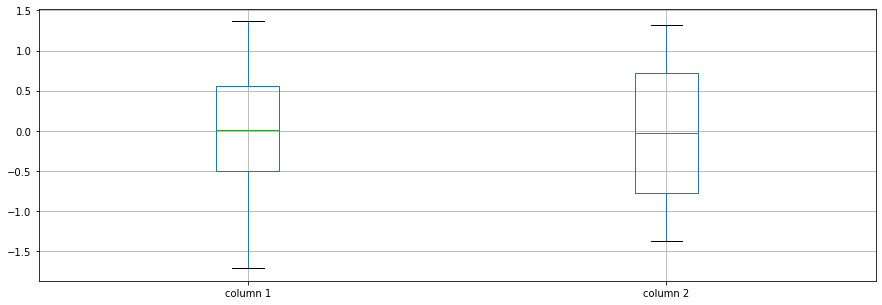

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.006711
column 2   -0.005335
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2
column 1,1.000000,-0.001987
column 2,-0.001987,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [2,2+8,2+8+8,2+8+8+8,2+8+8+8+8,2+8+8+8,2+8+8,2+8,2], vae_layer = False, seed = 20)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [2]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 1.188213658094406
Epoch: 1 , loss: 1.1852595403194428
Epoch: 2 , loss: 1.1872812371253967
Epoch: 3 , loss: 1.1857225153446198
Epoch: 4 , loss: 1.1859341082572936
Epoch: 5 , loss: 1.185413540124893
Epoch: 6 , loss: 1.1868482718467712
Epoch: 7 , loss: 1.1846263635158538
Epoch: 8 , loss: 1.1864742052555084
Epoch: 9 , loss: 1.184961266040802
Epoch: 10 , loss: 1.185476665496826
Epoch: 11 , loss: 1.1856662623882295
Epoch: 12 , loss: 1.1861814558506012
Epoch: 13 , loss: 1.1854645743370056
Epoch: 14 , loss: 1.187719676733017
Epoch: 15 , loss: 1.1869239032268524
Epoch: 16 , loss: 1.1852482080459594
Epoch: 17 , loss: 1.1867954325675965
Epoch: 18 , loss: 1.186752674818039
Epoch: 19 , loss: 1.1858260374069214
Epoch: 20 , loss: 1.1851590883731842
Epoch: 21 , loss: 1.187505342721939
Epoch: 22 , loss: 1.1859715640544892
Epoch: 23 , loss: 1.1867816138267517
Epoch: 24 , loss: 1.1867047035694123
Epoch: 25 , loss: 1.18700

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4000, 2)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.025127
column 2   -1.258200
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\CNP.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2
0,0.0,1.231004
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
3995,0.0,-0.282226
3996,0.0,0.000000
3997,0.0,-0.089904
3998,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(25.060167175069882, 64.9340549279942)

In [17]:
NRMS=numerator/denominator
NRMS


0.38593257733340797

In [18]:
new_df.iloc[66,:]

column 1    0.12305
column 2   -1.03610
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2
0,-0.45866,-0.004196
1,0.24348,-0.873130
2,0.25071,-0.808030
3,0.21462,-0.951980
4,0.12829,-1.031400
...,...,...
3995,0.89265,-0.004196
3996,0.74741,0.428530
3997,1.07660,-0.004196
3998,0.70388,0.351420


In [20]:
imputations[-1].to_excel("CNP_AG_20(imp).xlsx", index=False, header=False)